After completing our EDA our next step was to begin to understand the thoughts, feelings and emotions of the underrepresented communities. For this, we incorporated Sentiment Analysis (or opinion mining) - a Natural Language Processing Technique. 
Using our cleaned tokenised dataset, we found the sentiments of each article and then summarized each sentiment or valance. 

Valance, being the subjectivity or polarity of text, was visualized using pie charts. Polarity is the emotional state represented by Negative, Neutral and Positive or -1, 0 and 1 respectively. Subjectivity is represented by a point between 0 and 1 - 0 being objective and 1 being subjective or highly subjective. 

How we grouped Polarity scores
Positive - Greater than or equal to 0.1 and less than 1
Neutral - Equal to 0
Negative - Less than 0 and greater than -1

How we grouped Subjectivity scores
Objective - Less than or equal to 0.4 and greater than or equal to 0
Subjective - Greater than or equal to 0.5 and less than 1

Below we take you through the process of our text analysis.

In [1]:
!pip install textblob

  Using cached textblob-0.15.3-py2.py3-none-any.whl (636 kB)
  Using cached nltk-3.6.2-py3-none-any.whl (1.5 MB)
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Using cached regex-2021.7.6-cp38-cp38-manylinux2014_x86_64.whl (737 kB)


In [2]:
!pip install matplotlib

  Using cached matplotlib-3.4.2-cp38-cp38-manylinux1_x86_64.whl (10.3 MB)
  Using cached kiwisolver-1.3.1-cp38-cp38-manylinux1_x86_64.whl (1.2 MB)
  Using cached Pillow-8.3.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (3.0 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)


In [30]:
!pip install seaborn

  Using cached seaborn-0.11.1-py3-none-any.whl (285 kB)
  Using cached scipy-1.7.0-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (28.4 MB)


In [31]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io
import os
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

<b> READING IN OUR TOKENIZED DATASET OF SEATTLE'S LOCAL AND UNDERREPRESENTED COMMUNITIES ARTICLES WITH A TITLE, MEDIA (SOURCE) AND DESCRIPTION (SUMMARY THAT WAS TOKENIZED) COLUMN.
    


In [4]:
# infile = 'news_clean_tokens_7-21.csv'

# with open(infile, 'r') as csvfile:
#     rows = csv.reader(csvfile)
    
df = pd.read_csv('news_clean_tokens_8-21.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,title,media,date,desc,link,Local,newtrititle,newtridesc
0,0,0.0,0.0,0.0,"['release', 'video', 'fatal', 'shooting', 'new...",The Seattle Times,2019-01-01,"['faletogo', 'died', 'gunshot', 'wound', 'head...",https://www.seattletimes.com/seattle-news/crim...,0,"[('release', 'video', 'fatal'), ('video', 'fat...","[('faletogo', 'died', 'gunshot'), ('died', 'gu..."
1,1,1.0,1.0,1.0,"['fatal', 'shooting', 'test', 'new', 'accounta...",Crosscut,2019-01-01,"['faletogo', 'stopped', 'driving', 'new', 'yea...",https://crosscut.com/2019/01/fatal-seattle-pol...,0,"[('fatal', 'shooting', 'test'), ('shooting', '...","[('faletogo', 'stopped', 'driving'), ('stopped..."
2,2,2.0,2.0,2.0,"['release', 'body', 'cam', 'footage', 'fatal',...",MyNorthwest.com,2019-01-01,"['released', 'body', 'cam', 'footage', 'involv...",https://mynorthwest.com/1232749/seattle-police...,0,"[('release', 'body', 'cam'), ('body', 'cam', '...","[('released', 'body', 'cam'), ('body', 'cam', ..."
3,3,3.0,3.0,3.0,"['former', 'chief', 'jim', 'pugel', 'run', 'ci...",The Seattle Times,2019-01-01,"['two', 'dozen', 'candidate', 'running', 'acro...",https://www.seattletimes.com/seattle-news/poli...,0,"[('former', 'chief', 'jim'), ('chief', 'jim', ...","[('two', 'dozen', 'candidate'), ('dozen', 'can..."
4,4,4.0,4.0,4.0,"['judge', 'dismisses', 'claim', '2', 'fatal', ...",The Seattle Times,2019-01-01,"['lyles', 'history', 'contact', 'call', 'repor...",https://www.seattletimes.com/seattle-news/crim...,0,"[('judge', 'dismisses', 'claim'), ('dismisses'...","[('lyles', 'history', 'contact'), ('history', ..."


<b> FINDING SENTIMENTS BY ARTICLE AND ADDING SENTIMENTS COLUMNS TO DATAFRAME </b>


In [5]:
import csv
infile = 'news_clean_tokens_8-21.csv'

In [8]:
pol = []
sub = []
description =[]
with open(infile, 'r') as csvfile:
    columns = csv.reader(csvfile)
    for column in columns:
        desc = column[7]
        blob = TextBlob(desc)
        #print (desc)
        #print (blob.sentiment.polarity, blob.sentiment.subjectivity)
        p = blob.sentiment.polarity
        s = blob.sentiment.subjectivity
        #print(p)
        pol.append(p)
        sub.append(s)
        description.append(desc)
#print(pol)
#print(sub)

In [9]:
page_columns= {'description': description, 'polarity': pol,'subjectivity': sub}
df_ps = pd.DataFrame.from_dict(page_columns)
df_ps
df_ps = df_ps.drop(labels=0, axis=0)
df_ps

#solution to index and values problem (ValueError: Length of values (13624) does not match length of index (16291)
# df_ps.apply(lambda values: values.drop_duplicates().reset_index(drop=True))



# for ind, row in df_ps.itertuples():
#     df_ps.loc[ind, 'positive'] = row['polarity']> 0

,description,polarity,subjectivity
1,"['faletogo', 'died', 'gunshot', 'wound', 'head...",0.000000,0.000000
2,"['faletogo', 'stopped', 'driving', 'new', 'yea...",0.136364,0.454545
3,"['released', 'body', 'cam', 'footage', 'involv...",0.000000,0.000000
4,"['two', 'dozen', 'candidate', 'running', 'acro...",0.000000,0.000000
5,"['lyles', 'history', 'contact', 'call', 'repor...",0.000000,0.100000
...,...,...,...
23236,"['talked', 'mark', 'jamieson', 'say', 'aware',...",0.250000,0.250000
23237,"['woman', 'died', 'three', 'time', 'hit', 'bla...",0.000000,0.000000
23238,"['30', 'year', 'old', 'civilian', 'employee', ...",0.100000,0.200000
23239,"['metro', 'transit', 'nearby', 'department', '...",0.000000,0.000000


<b> NOW TO CATEGORIZE THE VALANCE/SENTIMENT SCORES UNDER TWO MORE COLUMNS

In [10]:
#now adding positive, negative, neutral, objective and subjective into the valance columns
polarity2 = []


for value in df_ps['polarity']:
    if value >= 0.1 and value <= 1:
        polarity2.append("positive")
    elif value == 0:
        polarity2.append("neutral")
    else:
        polarity2.append("negative")
        
df_ps['polarity2'] = polarity2   


In [11]:
subjectivity2 = []
for value in df_ps['subjectivity']:
    if value >= 0.5:
        subjectivity2.append("subjective")
    else:
        subjectivity2.append("objective")
        
df_ps['subjectivity2'] = subjectivity2

In [13]:
df_ps.head()

,description,polarity,subjectivity,polarity2,subjectivity2
1,"['faletogo', 'died', 'gunshot', 'wound', 'head...",0.000000,0.000000,neutral,objective
2,"['faletogo', 'stopped', 'driving', 'new', 'yea...",0.136364,0.454545,positive,objective
3,"['released', 'body', 'cam', 'footage', 'involv...",0.000000,0.000000,neutral,objective
4,"['two', 'dozen', 'candidate', 'running', 'acro...",0.000000,0.000000,neutral,objective
5,"['lyles', 'history', 'contact', 'call', 'repor...",0.000000,0.100000,neutral,objective


<b> MOVING ON TO VISUALIZATION BY SUMMARIZING SENTIMENT - VALANCE </b>
    
  

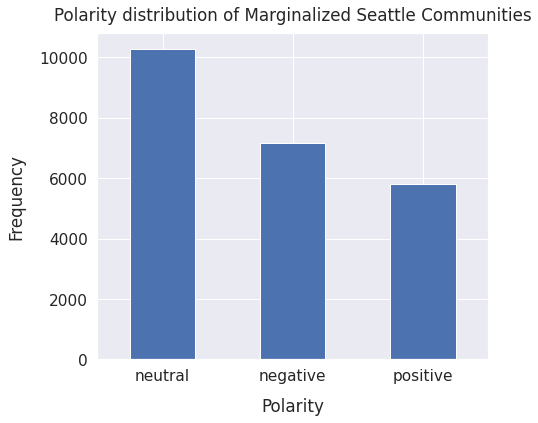

In [37]:
sns.set(font_scale=1.4)
df_ps['polarity2'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Polarity", labelpad=14)
plt.ylabel("Frequency", labelpad=14)
plt.title("Polarity distribution of Marginalized Seattle Communities", y=1.02);



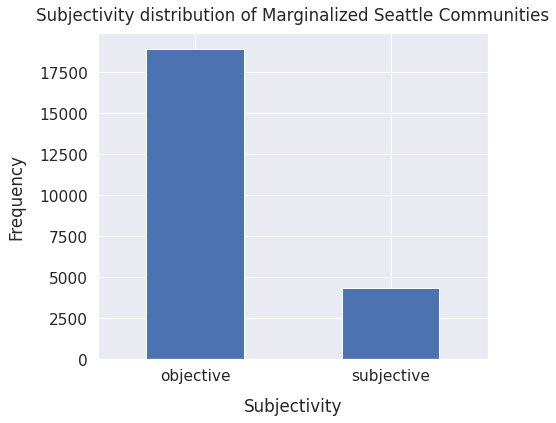

In [38]:
df_ps['subjectivity2'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Subjectivity", labelpad=14)
plt.ylabel("Frequency", labelpad=14)
plt.title("Subjectivity distribution of Marginalized Seattle Communities", y=1.02);

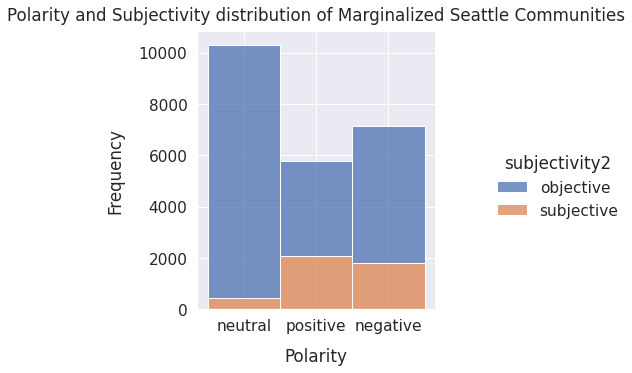

In [42]:
# df_ps = df.groupby(['polarity2', 'objectivity2']).size().reset_index().pivot(columns='polarity2', index='subjectivity2', values=0)
# df_ps.plot(kind='bar', stacked=True)

sns.displot(df_ps, x='polarity2', hue='subjectivity2', multiple='stack')
plt.xlabel("Polarity", labelpad=14)
plt.ylabel("Frequency", labelpad=14)
plt.title("Polarity and Subjectivity distribution of Marginalized Seattle Communities", y=1.02);

In [43]:
my_file ='news_clean_tokens_tableau.csv'
df_ps.to_csv(my_file, index=False)


<b> CONGRATS, YOU HAVE COMPLETED YOUR SENTIMENT ANALYSIS!